In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
abt = pd.read_csv("/content/customer_churn.csv")
abt.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
print(abt['CreditScore'].max())
print(abt['Age'].max())
print(abt['Tenure'].max())
print(abt['Balance'].max())
print(abt['NumOfProducts'].max())
print(abt['EstimatedSalary'].max())

850
92
10
250898.09
4
199992.48


In [44]:
print(abt['CreditScore'].min())
print(abt['Age'].min())
print(abt['Tenure'].min())
print(abt['Balance'].min())
print(abt['NumOfProducts'].min())
print(abt['EstimatedSalary'].min())

350
18
0
0.0
1
11.58


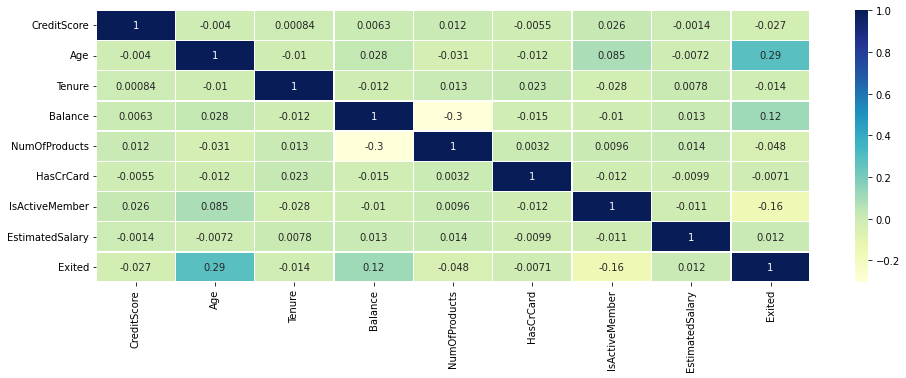

In [4]:
import seaborn as sns 
plt.figure(figsize = (16,5))
sns.heatmap(abt.corr(),annot=True, cmap="YlGnBu",linewidths=.5)
plt.show()

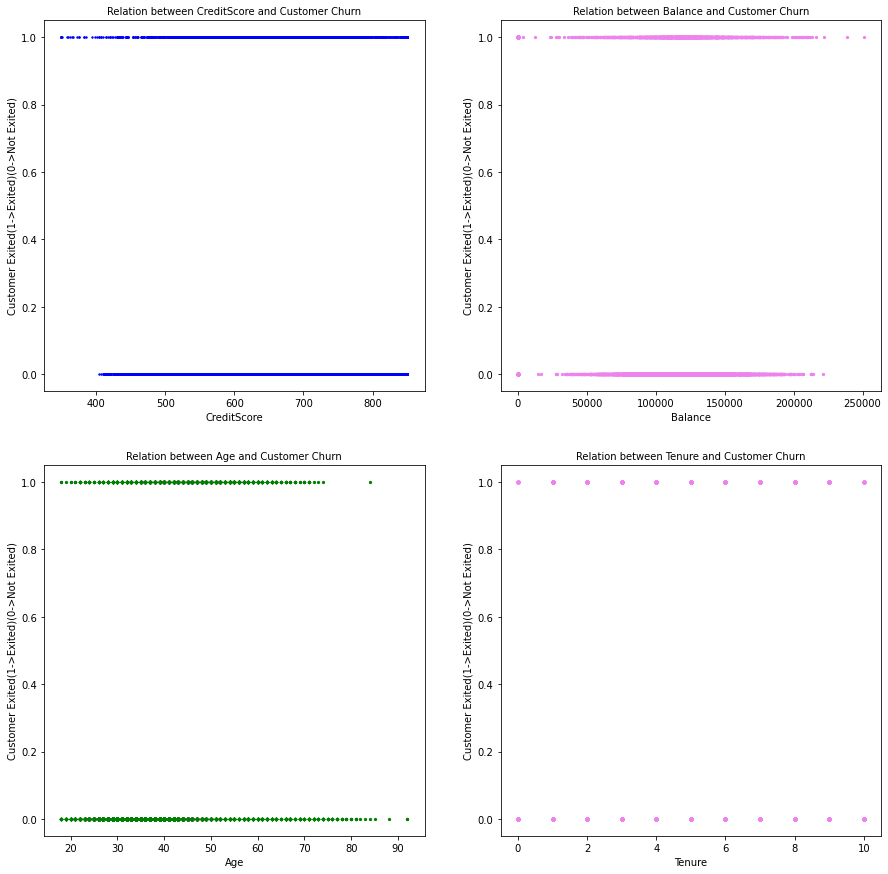

In [5]:
fig,a =  plt.subplots(2,2,figsize=(15,15))


a[0][0].scatter(abt['CreditScore'],abt['Exited'],s=2,color="blue")
a[0][0].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[0][0].set_xlabel("CreditScore")
a[0][0].set_title("Relation between CreditScore and Customer Churn",fontsize=10)


a[0][1].scatter(abt['Balance'],abt['Exited'],s=5,color="violet")
a[0][1].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[0][1].set_xlabel("Balance")
a[0][1].set_title("Relation between Balance and Customer Churn",fontsize=10)


a[1][0].scatter(abt['Age'],abt['Exited'],s=5,color="green")
a[1][0].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[1][0].set_xlabel("Age")
a[1][0].set_title("Relation between Age and Customer Churn",fontsize=10)


a[1][1].scatter(abt['Tenure'],abt['Exited'],s=5,color="violet")
a[1][1].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[1][1].set_xlabel("Tenure")
a[1][1].set_title("Relation between Tenure and Customer Churn",fontsize=10)

plt.show()

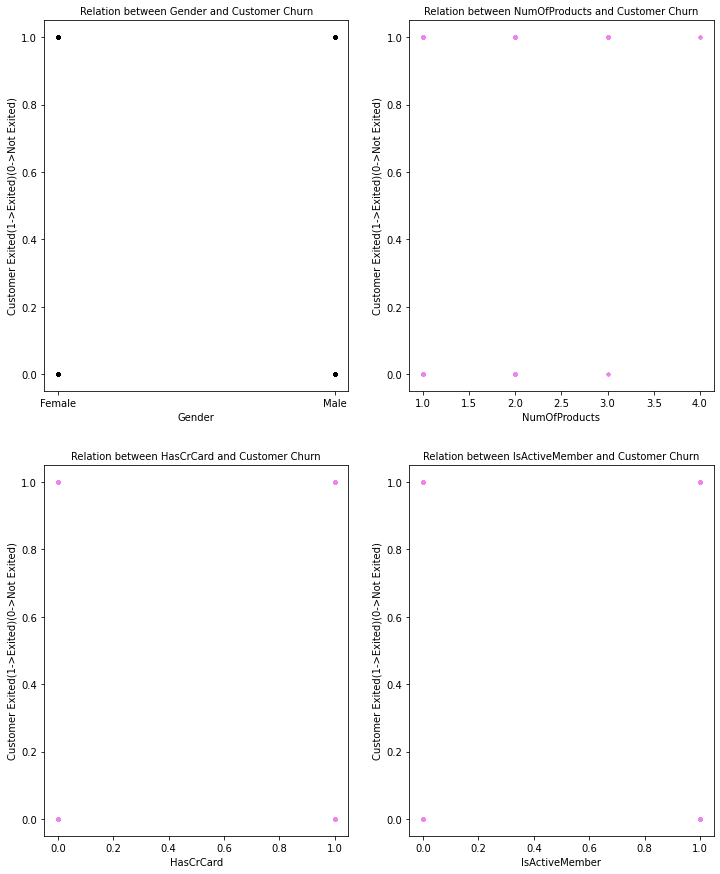

In [6]:
fig,a =  plt.subplots(2,2,figsize=(12,15))



a[0][0].scatter(abt['Gender'],abt['Exited'],s=5,color="black")
a[0][0].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[0][0].set_xlabel("Gender")
a[0][0].set_title("Relation between Gender and Customer Churn",fontsize=10)


a[0][1].scatter(abt['NumOfProducts'],abt['Exited'],s=5,color="violet")
a[0][1].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[0][1].set_xlabel("NumOfProducts")
a[0][1].set_title("Relation between NumOfProducts and Customer Churn",fontsize=10)

a[1][0].scatter(abt['HasCrCard'],abt['Exited'],s=5,color="violet")
a[1][0].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[1][0].set_xlabel("HasCrCard")
a[1][0].set_title("Relation between HasCrCard and Customer Churn",fontsize=10)


a[1][1].scatter(abt['IsActiveMember'],abt['Exited'],s=5,color="violet")
a[1][1].set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a[1][1].set_xlabel("IsActiveMember")
a[1][1].set_title("Relation between IsActiveMember and Customer Churn",fontsize=10)



plt.show()


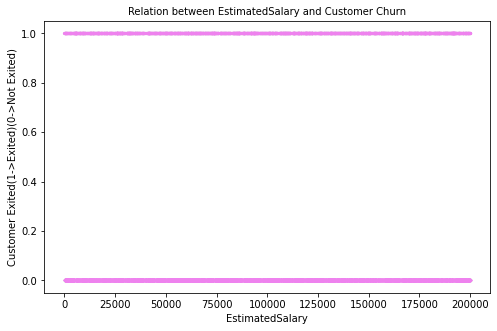

In [7]:
fig,a =  plt.subplots(figsize=(8,5))


a.scatter(abt['EstimatedSalary'],abt['Exited'],s=5,color="violet")
a.set_ylabel("Customer Exited(1->Exited)(0->Not Exited)")
a.set_xlabel("EstimatedSalary")
a.set_title("Relation between EstimatedSalary and Customer Churn",fontsize=10)

plt.show()

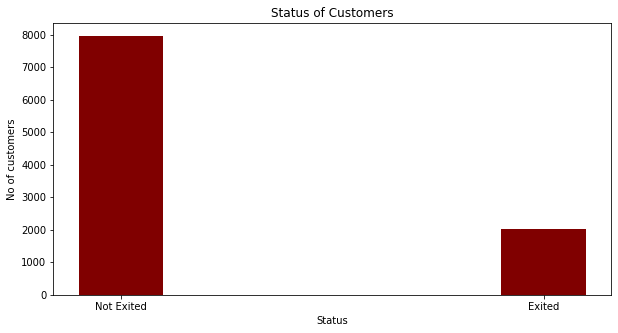

In [8]:
data = {'Not Exited':7963,'Exited':2037}
status = list(data.keys())
count = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.bar(status, count, color ='maroon',
        width = 0.2)
 
plt.xlabel("Status")
plt.ylabel("No of customers")
plt.title("Status of Customers")
plt.show()

In [9]:
y = abt.Exited

X = abt.drop(['Exited','Geography'], axis=1)

print(X.shape, y.shape)

(10000, 9) (10000,)


In [10]:
num_columns = X.select_dtypes(include='number').columns.tolist()
num_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [11]:
scaler = MinMaxScaler()
X[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']] = scaler.fit_transform(X[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']])
c = X.values
print(X[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']])
print(c[0])

      CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538  0.324324     0.2  0.000000       0.000000        1.0   
1           0.516  0.310811     0.1  0.334031       0.000000        0.0   
2           0.304  0.324324     0.8  0.636357       0.666667        1.0   
3           0.698  0.283784     0.1  0.000000       0.333333        0.0   
4           1.000  0.337838     0.2  0.500246       0.000000        1.0   
...           ...       ...     ...       ...            ...        ...   
9995        0.842  0.283784     0.5  0.000000       0.333333        1.0   
9996        0.332  0.229730     1.0  0.228657       0.000000        1.0   
9997        0.718  0.243243     0.7  0.000000       0.000000        0.0   
9998        0.844  0.324324     0.3  0.299226       0.333333        1.0   
9999        0.884  0.135135     0.4  0.518708       0.000000        1.0   

      IsActiveMember  EstimatedSalary  
0                1.0         0.506735  
1                1.

In [12]:
print(abt['Geography'].value_counts())
print(abt['Gender'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [13]:
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_columns

['Gender']

In [14]:
cd = ColumnTransformer([('encoder', OneHotEncoder(), [1,1])], remainder='passthrough')
print(X)
X = np.array(cd.fit_transform(X))
print(X[0])
print(X[1])

      CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
0           0.538  Female  0.324324     0.2  0.000000       0.000000   
1           0.516  Female  0.310811     0.1  0.334031       0.000000   
2           0.304  Female  0.324324     0.8  0.636357       0.666667   
3           0.698  Female  0.283784     0.1  0.000000       0.333333   
4           1.000  Female  0.337838     0.2  0.500246       0.000000   
...           ...     ...       ...     ...       ...            ...   
9995        0.842    Male  0.283784     0.5  0.000000       0.333333   
9996        0.332    Male  0.229730     1.0  0.228657       0.000000   
9997        0.718  Female  0.243243     0.7  0.000000       0.000000   
9998        0.844    Male  0.324324     0.3  0.299226       0.333333   
9999        0.884  Female  0.135135     0.4  0.518708       0.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           1.0             1.0         0.506735  
1           0.0             1.0  

In [15]:
abt['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:

random_state = 10

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=abt.Exited)

print(len(X_train), len(X_test), len(y_train), len(y_test))

7000 3000 7000 3000


In [17]:
print(X_train)

[[0.         1.         0.         ... 0.         1.         0.92033584]
 [0.         1.         0.         ... 1.         1.         0.00951506]
 [0.         1.         0.         ... 0.         0.         0.41997116]
 ...
 [0.         1.         0.         ... 1.         0.         0.2251702 ]
 [1.         0.         1.         ... 1.         1.         0.87488385]
 [0.         1.         0.         ... 1.         0.         0.11522565]]


In [18]:
classifier= KNeighborsClassifier(n_neighbors=2)  
history = classifier.fit(X_train, y_train)
print(history)

KNeighborsClassifier(n_neighbors=2)


In [19]:
y_pred= classifier.predict(X_test)
print(y_pred)
print(y_test.values)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [20]:
cm= confusion_matrix(y_test, y_pred)  
print(cm)
report = classification_report(y_test,y_pred)
print(report)

[[2315   74]
 [ 469  142]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2389
           1       0.66      0.23      0.34       611

    accuracy                           0.82      3000
   macro avg       0.74      0.60      0.62      3000
weighted avg       0.80      0.82      0.78      3000



In [21]:
knn_accuracy = classifier.score(X_test, y_test)
print(knn_accuracy)


0.819


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred= clf.predict(X_test)
print(y_pred)
print(y_test.values)

[0 0 0 ... 1 0 0]
[1 0 0 ... 0 0 0]


In [25]:
cm= confusion_matrix(y_test, y_pred)  
print(cm)
report = classification_report(y_test,y_pred)
print(report)

[[2023  366]
 [ 310  301]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2389
           1       0.45      0.49      0.47       611

    accuracy                           0.77      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.78      0.77      0.78      3000



In [26]:
dtree_accuracy = clf.score(X_test, y_test)
print(dtree_accuracy)

0.7746666666666666


In [27]:
from sklearn.svm import SVC

In [28]:
classifier = SVC(kernel='poly')  
classifier.fit(X_train, y_train)  

SVC(kernel='poly')

In [29]:
y_pred= classifier.predict(X_test)
print(y_pred)
print(y_test.values)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [30]:
cm= confusion_matrix(y_test, y_pred)  
print(cm)
report = classification_report(y_test,y_pred)
print(report)

[[2347   42]
 [ 417  194]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2389
           1       0.82      0.32      0.46       611

    accuracy                           0.85      3000
   macro avg       0.84      0.65      0.68      3000
weighted avg       0.84      0.85      0.82      3000



In [31]:
svm_accuracy = classifier.score(X_test, y_test)
print(svm_accuracy)

0.847


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
classifier= RandomForestClassifier(criterion = 'entropy',max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators= 100)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print(y_pred)
print(y_test.values)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [34]:

cm= confusion_matrix(y_test, y_pred)  
print(cm)
report = classification_report(y_test,y_pred)
print(report)

[[2305   84]
 [ 367  244]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2389
           1       0.74      0.40      0.52       611

    accuracy                           0.85      3000
   macro avg       0.80      0.68      0.72      3000
weighted avg       0.84      0.85      0.83      3000



In [35]:
rand_accuracy = classifier.score(X_test, y_test)
print(rand_accuracy)

0.8496666666666667


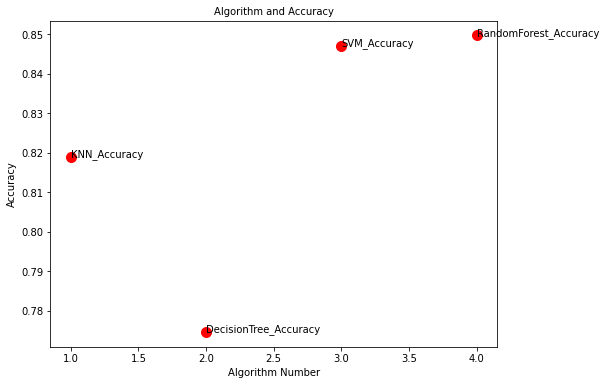

In [36]:

annotations=["KNN_Accuracy","DecisionTree_Accuracy","SVM_Accuracy","RandomForest_Accuracy"]
x1= [1,2,3,4]
y1= [knn_accuracy, dtree_accuracy, svm_accuracy,rand_accuracy]
plt.figure(figsize=(8,6))
plt.scatter(x1,y1,s=100,color="red")
plt.xlabel("Algorithm Number")
plt.ylabel("Accuracy")
plt.title("Algorithm and Accuracy",fontsize=10)
for i, label in enumerate(annotations):
    plt.annotate(label, (x1[i], y1[i]))

plt.show()


In [37]:
#code for testing the model with new value


fd = [[619,'France','Female',42,2,	0.00,	1,	1,	1,	101348.88]]
df = pd.DataFrame(fd, columns =['CreditScore','Geography', 'Gender','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']] = scaler.transform(df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']])
df = np.array(cd.transform(df))
print(df)

[[1.         0.         1.         0.         0.538      0.32432432
  0.2        0.         0.         1.         1.         0.50673489]]


In [38]:
y_pred= classifier.predict(df)
print(y_pred)

[1]


In [39]:
import pickle
data = {"model": classifier,"minmax":scaler,"onehotencoder":cd}
with open('model1(features).pkl', 'wb') as file:
    pickle.dump(data, file)

In [40]:
import pickle
import pandas as pd
import numpy as np
with open('/content/model1(features).pkl', 'rb') as file:
            data = pickle.load(file)

cdscore = int(850)
country= str('France')
Gender= str('Male')
age= int(34)
tenure= int(10)
balance= float(257896)
pds= int(4)
CreditCard= int(1)
Active= int(1)
salary= float(167832)

rand = data['model']
scaler = data['minmax']
cd = data['onehotencoder']

fd = [[cdscore,country,Gender,age,tenure,balance,pds,CreditCard,Active,salary]]
df = pd.DataFrame(fd, columns =['CreditScore','Geography', 'Gender','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']] = scaler.transform(df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']])
df = np.array(cd.transform(df))
print(df)

[[0.         1.         0.         1.         1.         0.21621622
  1.         1.02789144 1.         1.         1.         0.83918224]]


In [41]:
print(rand.predict(df))

[1]


In [42]:
rand_accuracy = rand.score(X_test, y_test)
print(rand_accuracy)

0.8496666666666667
